In [2]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt
import sys

In [3]:
img = cv2.imread('images.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(np.transpose(hist))


[[  4.   2.   0.   1.   0.   2.   1.   5.   5.   3.  12.   9.  15.  26.
   41.  53.  68. 124. 101.  81. 116. 106.  95. 190. 182. 185. 245. 306.
  403. 416. 396. 351. 261. 257. 247. 214. 215. 217. 246. 245. 240. 321.
  261. 280. 235. 297. 309. 323. 282. 303. 325. 300. 320. 279. 291. 339.
  394. 494. 415. 418. 471. 485. 446. 519. 443. 483. 503. 477. 502. 460.
  457. 476. 421. 374. 437. 390. 407. 391. 407. 396. 361. 463. 347. 272.
  278. 269. 269. 277. 283. 262. 239. 251. 260. 254. 249. 254. 230. 209.
  225. 208. 199. 241. 207. 216. 222. 183. 217. 222. 206. 232. 233. 215.
  236. 243. 220. 211. 196. 220. 162. 199. 174. 187. 196. 168. 205. 194.
  175. 217. 217. 169. 226. 246. 232. 187. 232. 211. 222. 207. 204. 186.
  194. 173. 171. 197. 180. 185. 181. 201. 193. 165. 153. 150. 160. 162.
  179. 131. 151. 155. 173. 177. 192. 204. 182. 206. 169. 199. 215. 221.
  234. 211. 223. 239. 223. 201. 222. 190. 178. 208. 204. 224. 227. 299.
  189. 242. 258. 262. 287. 303. 324. 214. 231. 233. 235. 224. 17

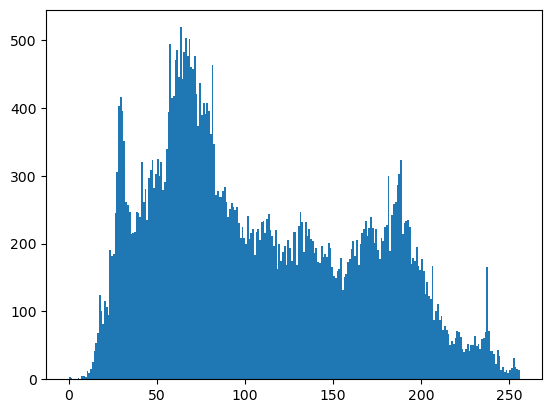

In [4]:

hist = np.bincount(img.ravel(),minlength=256)
plt.hist(img.ravel(),256,[0,256]); plt.show()

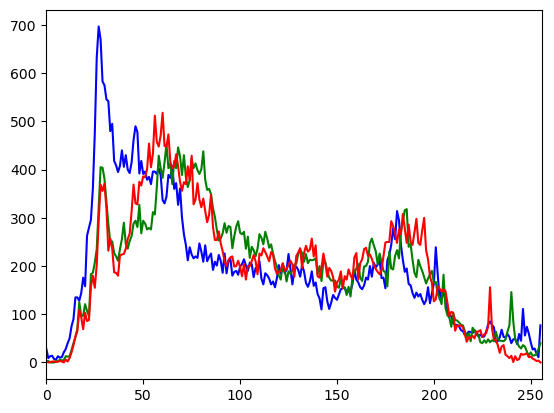

In [5]:
img = cv2.imread('images.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


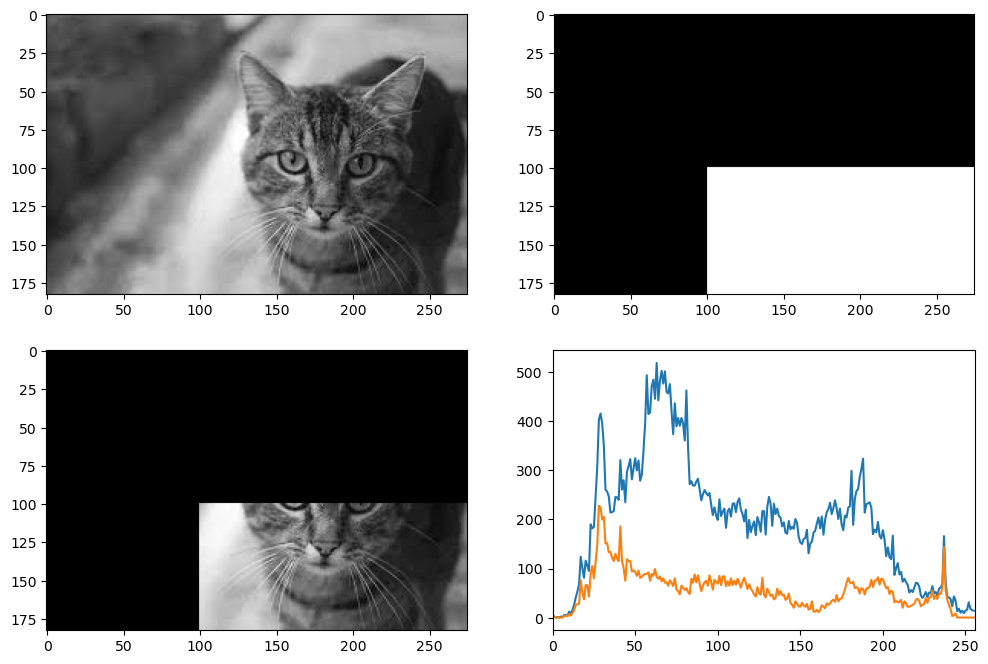

In [6]:
img = cv2.imread('images.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


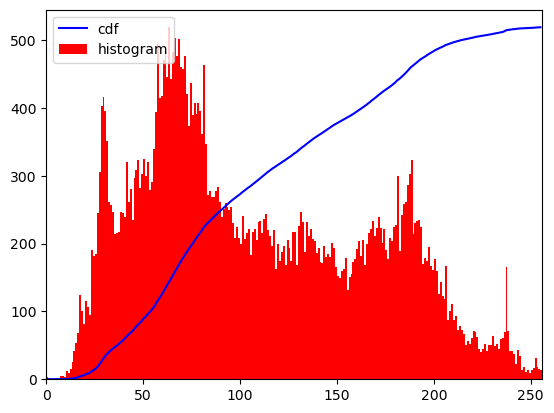

In [9]:
img = cv2.imread('images.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


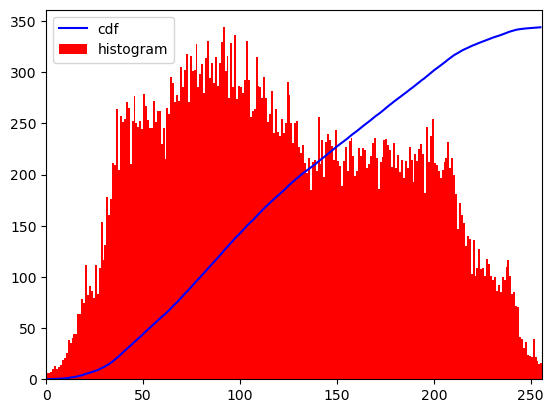

In [18]:

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


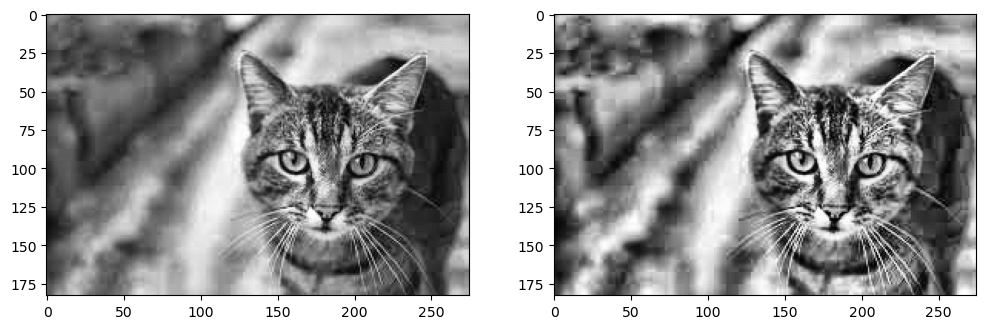

In [20]:
img = cv2.imread('images.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)


plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(cl1, 'gray')
plt.show()

In [16]:
img = cv2.imread('images.jpg',0) #mario
img2 = img.copy()
template = cv2.imread('slMG_2180.jpg',0) #coin
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

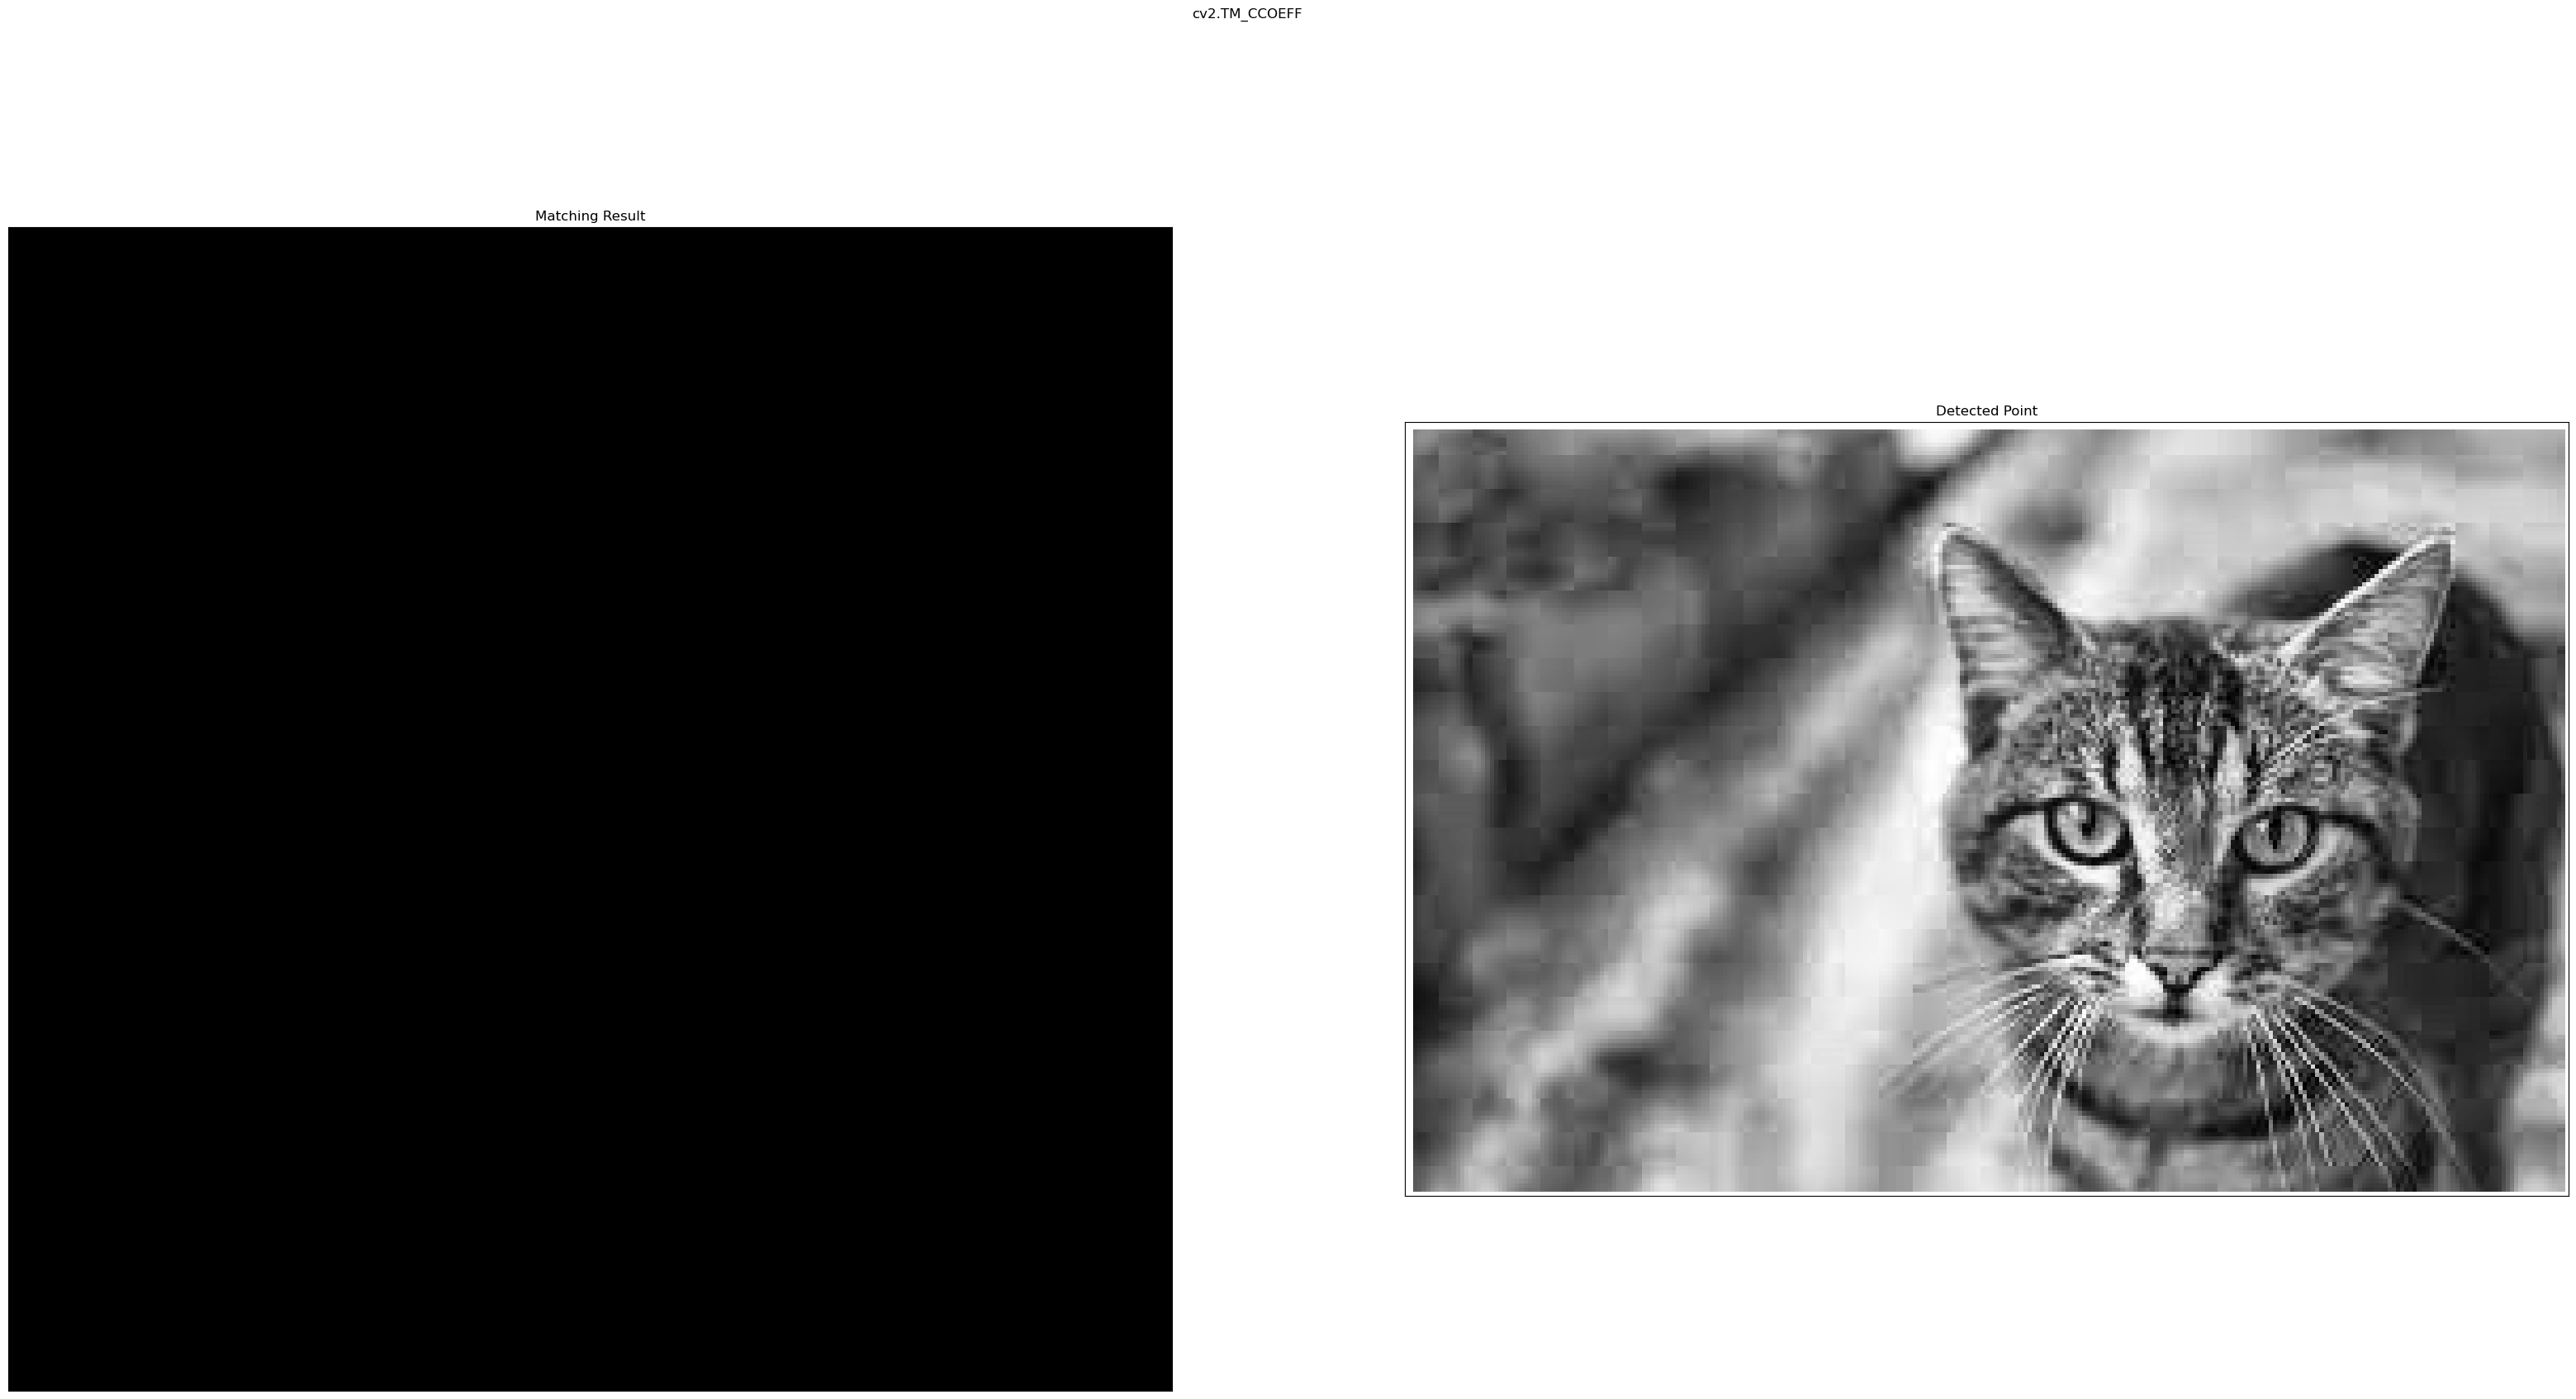

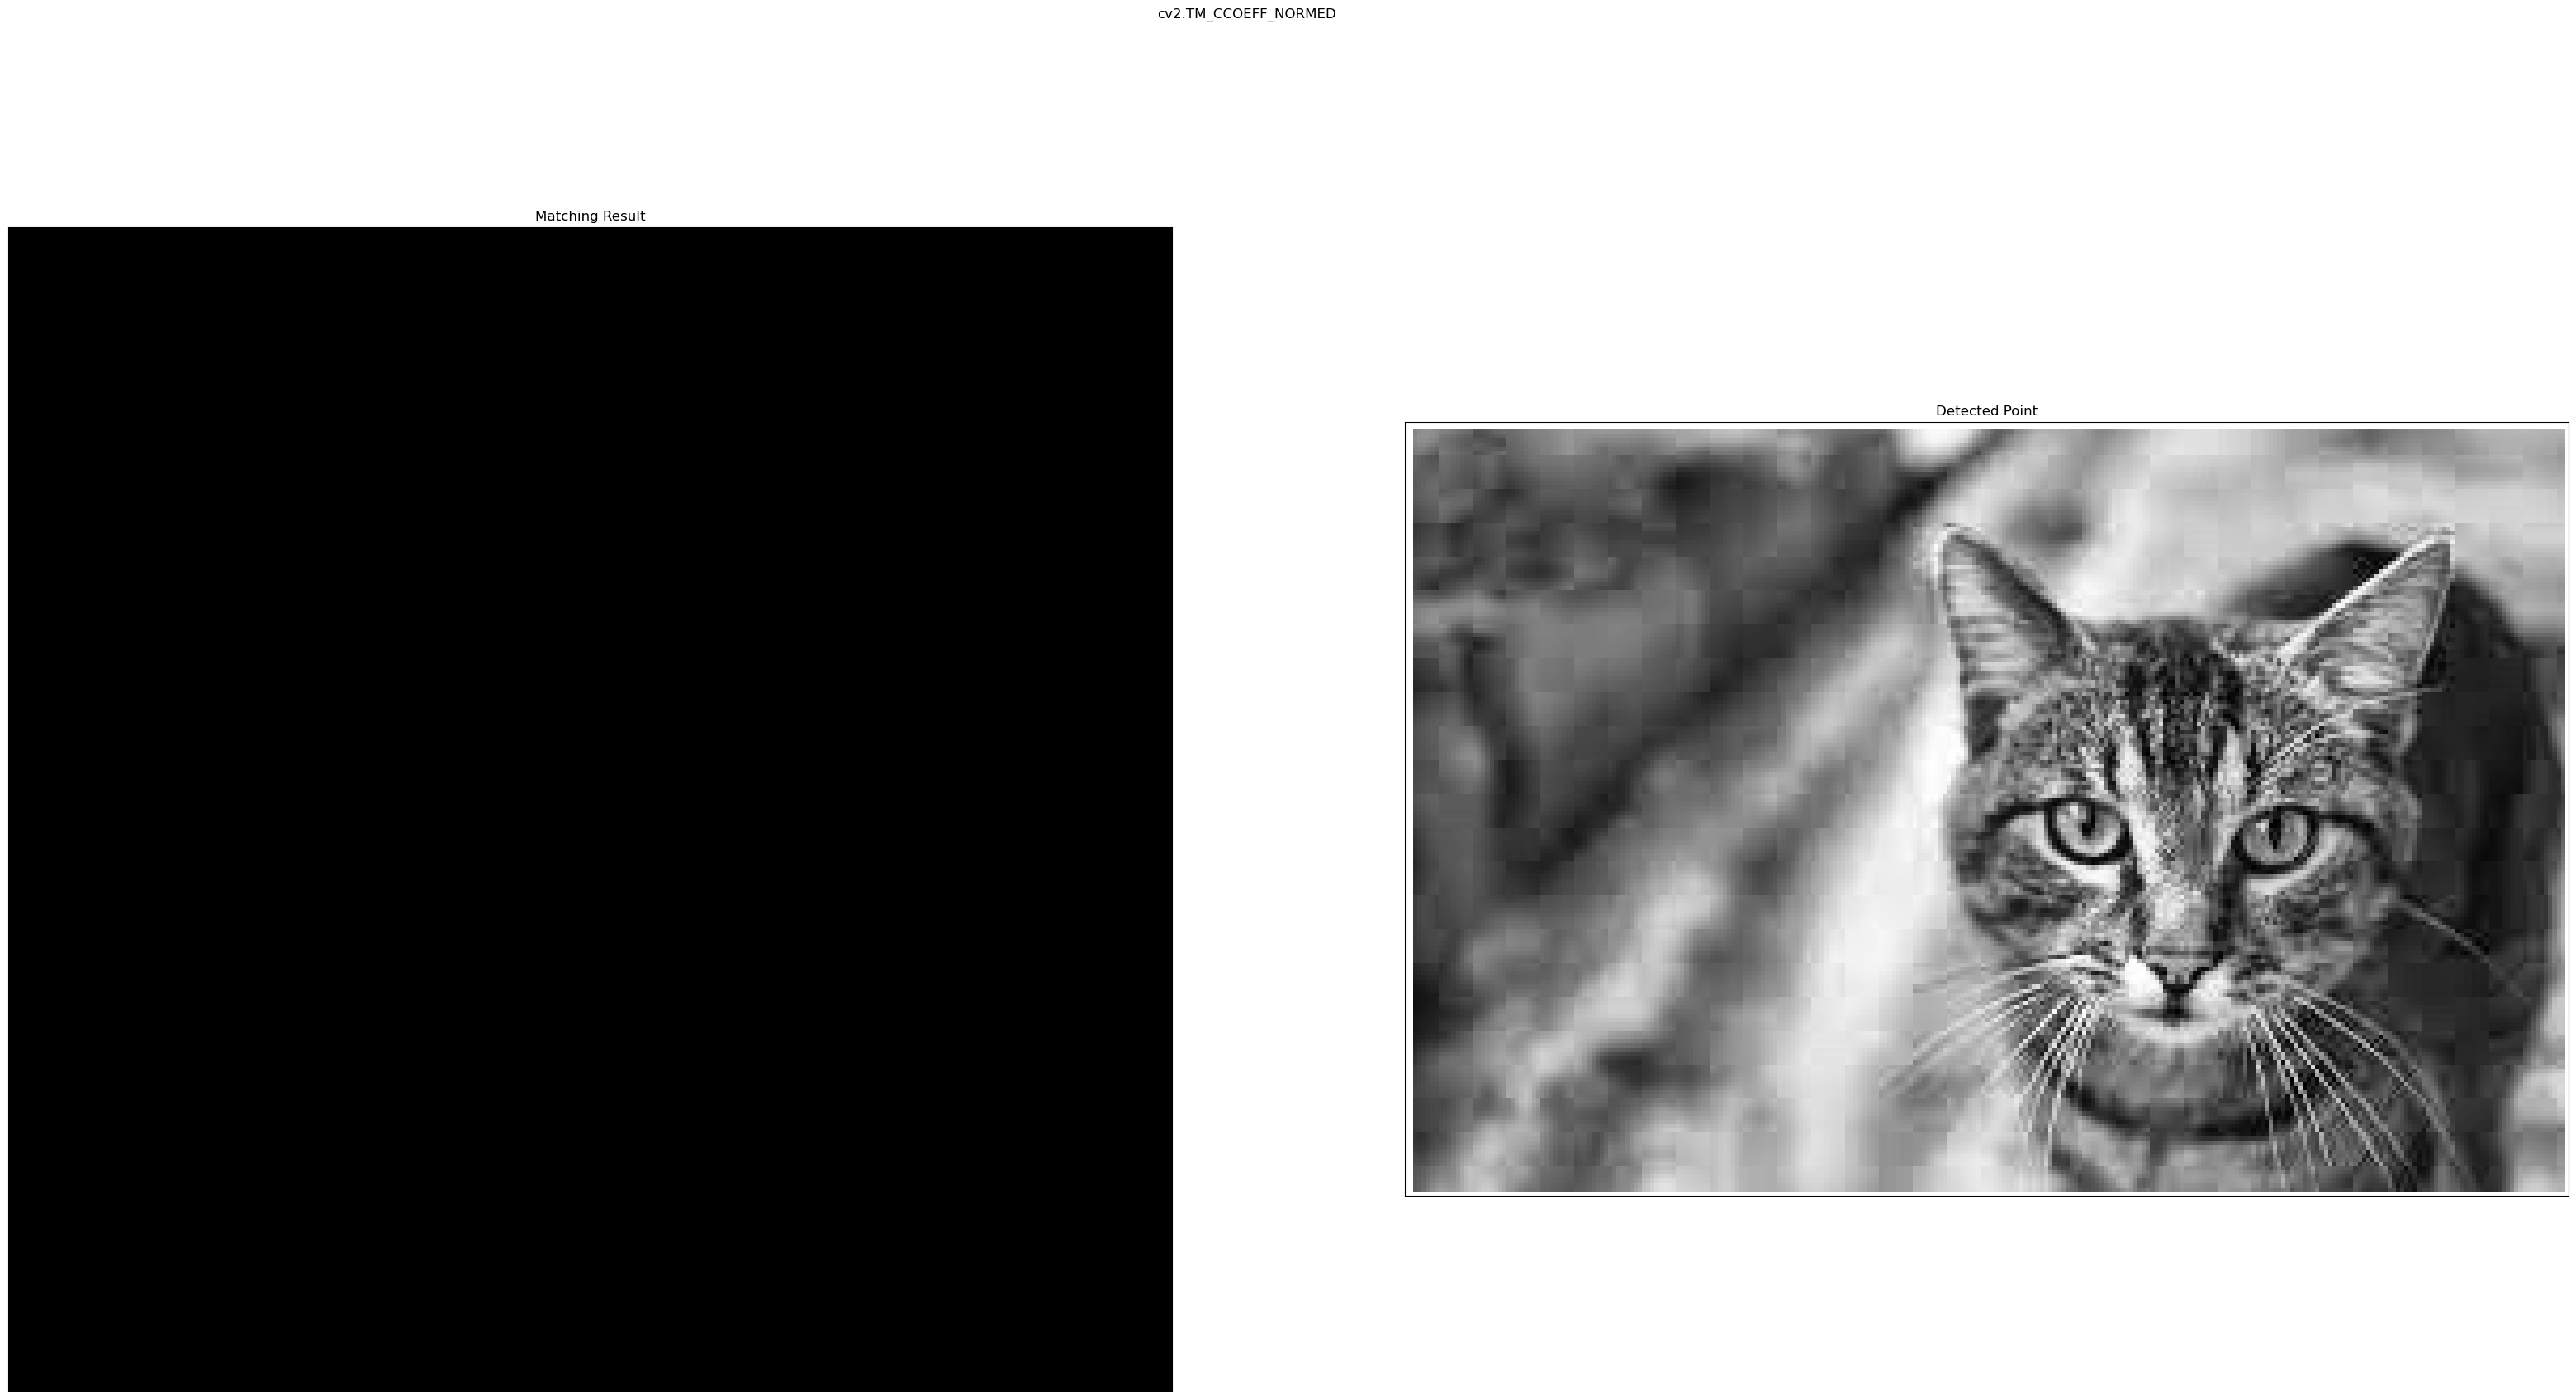

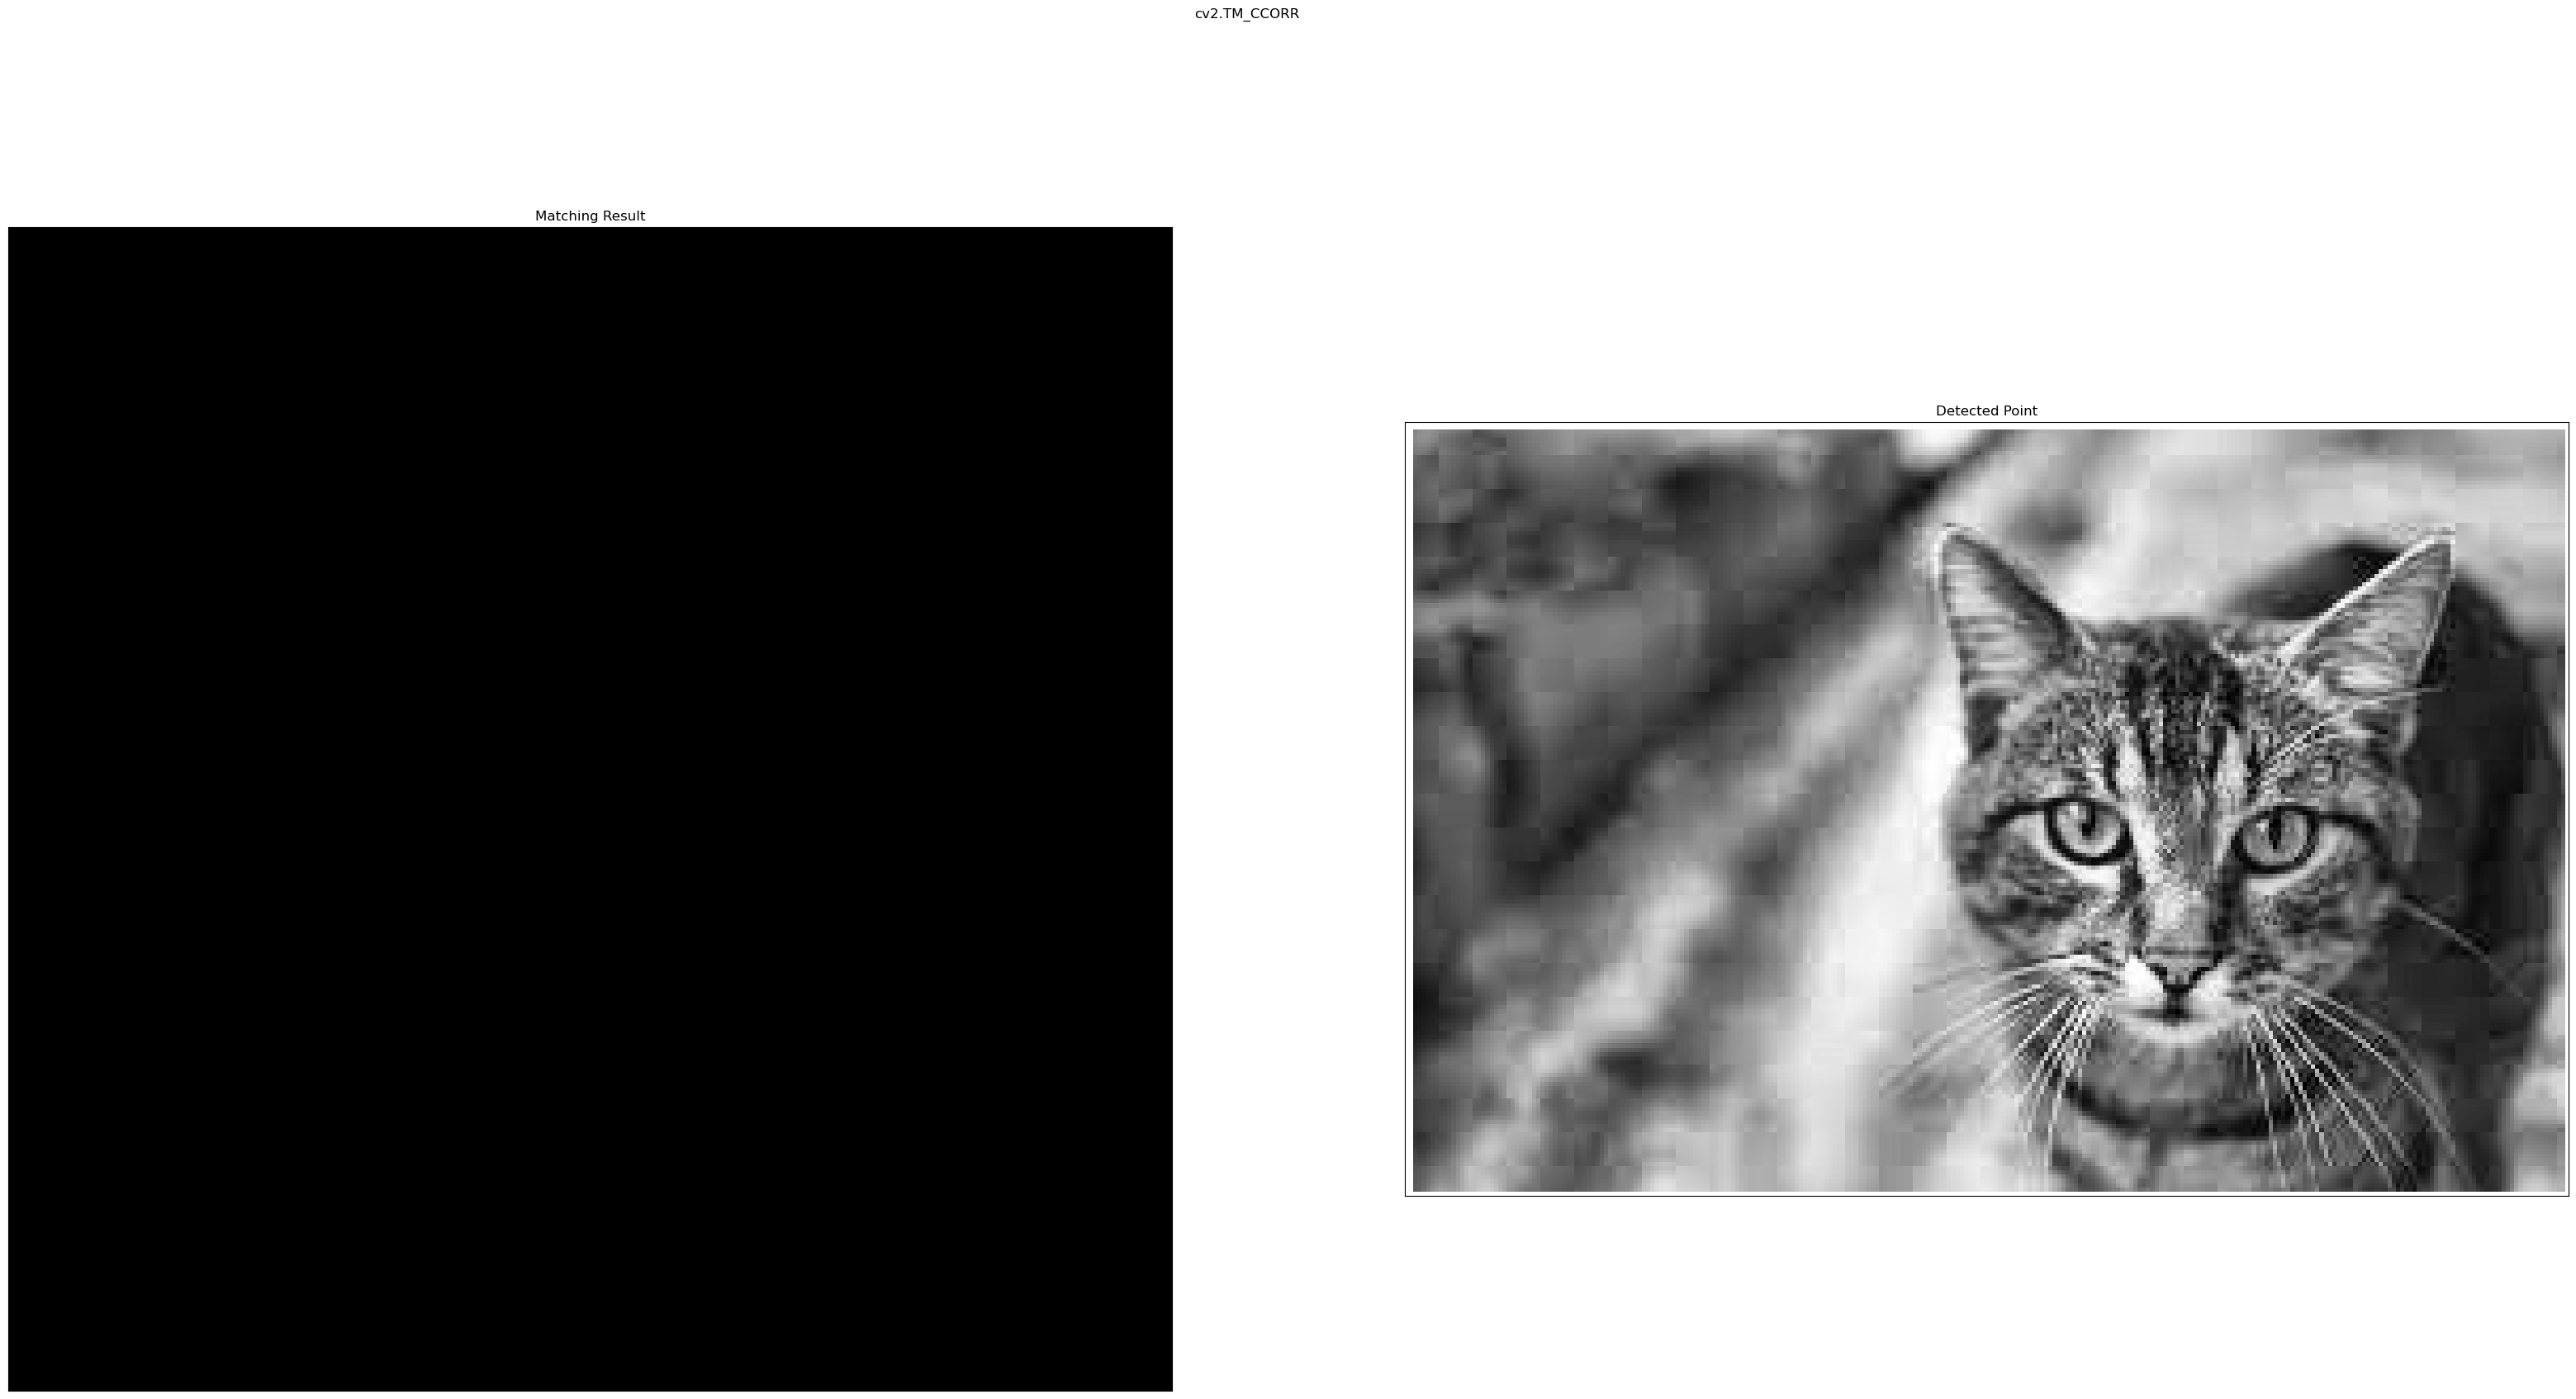

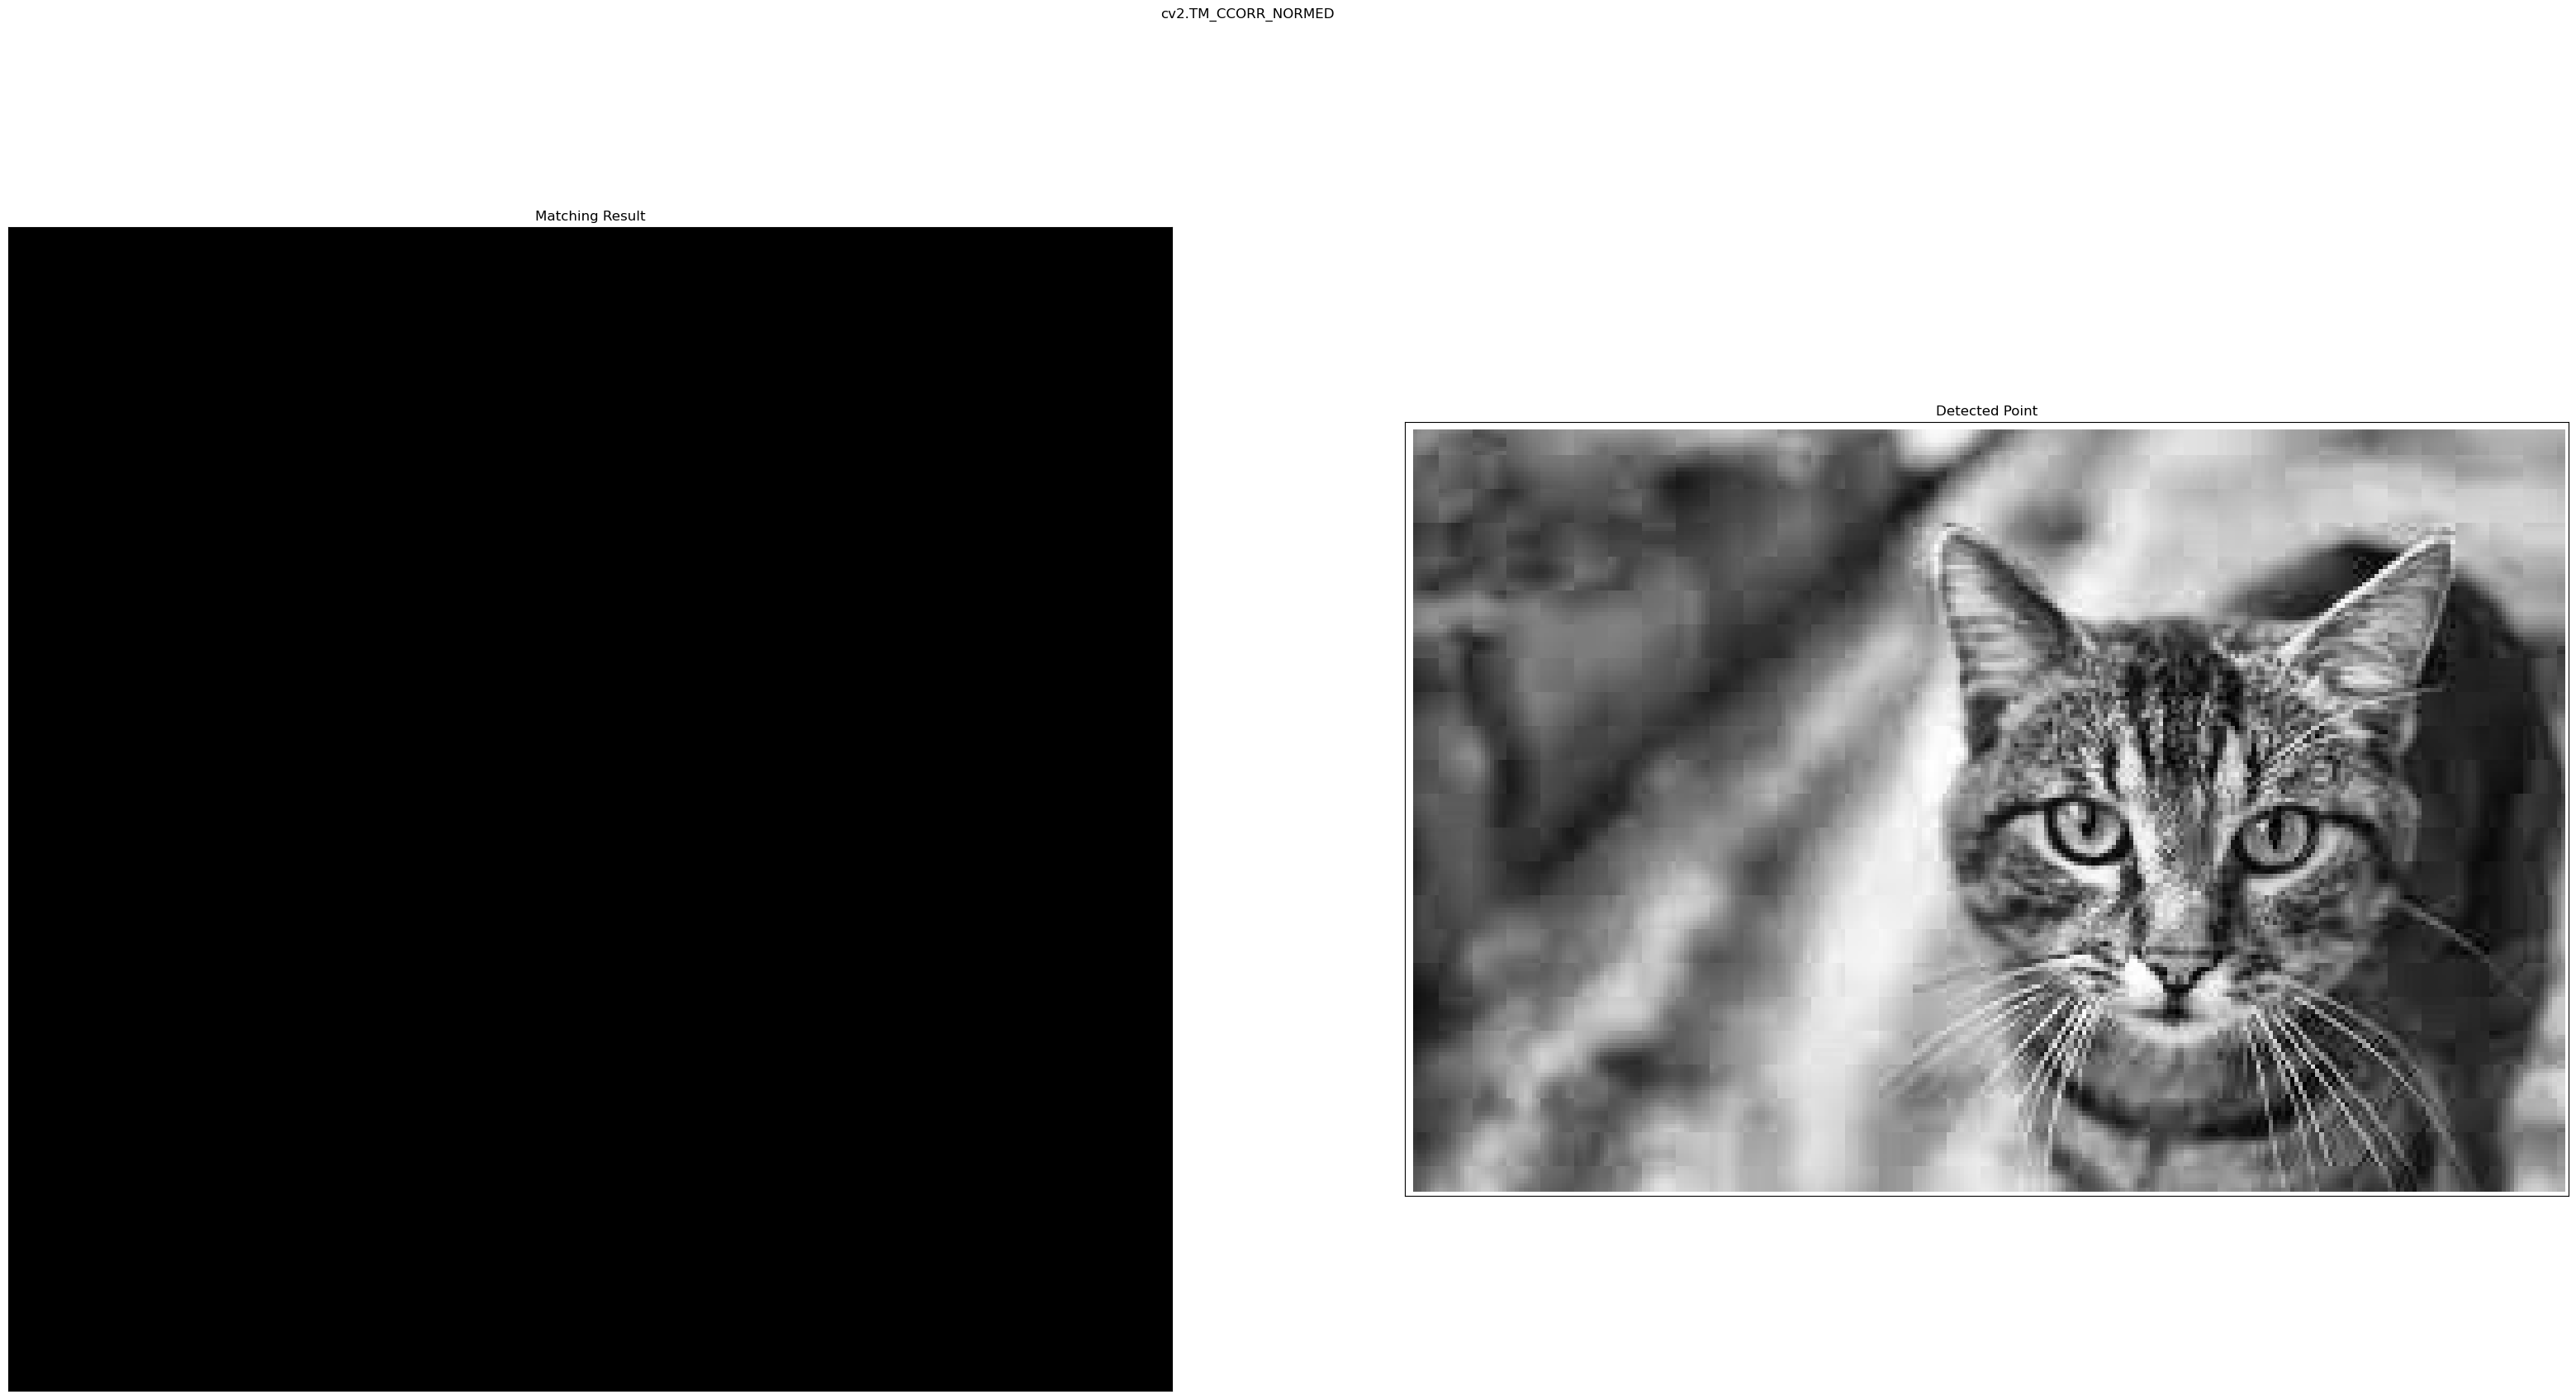

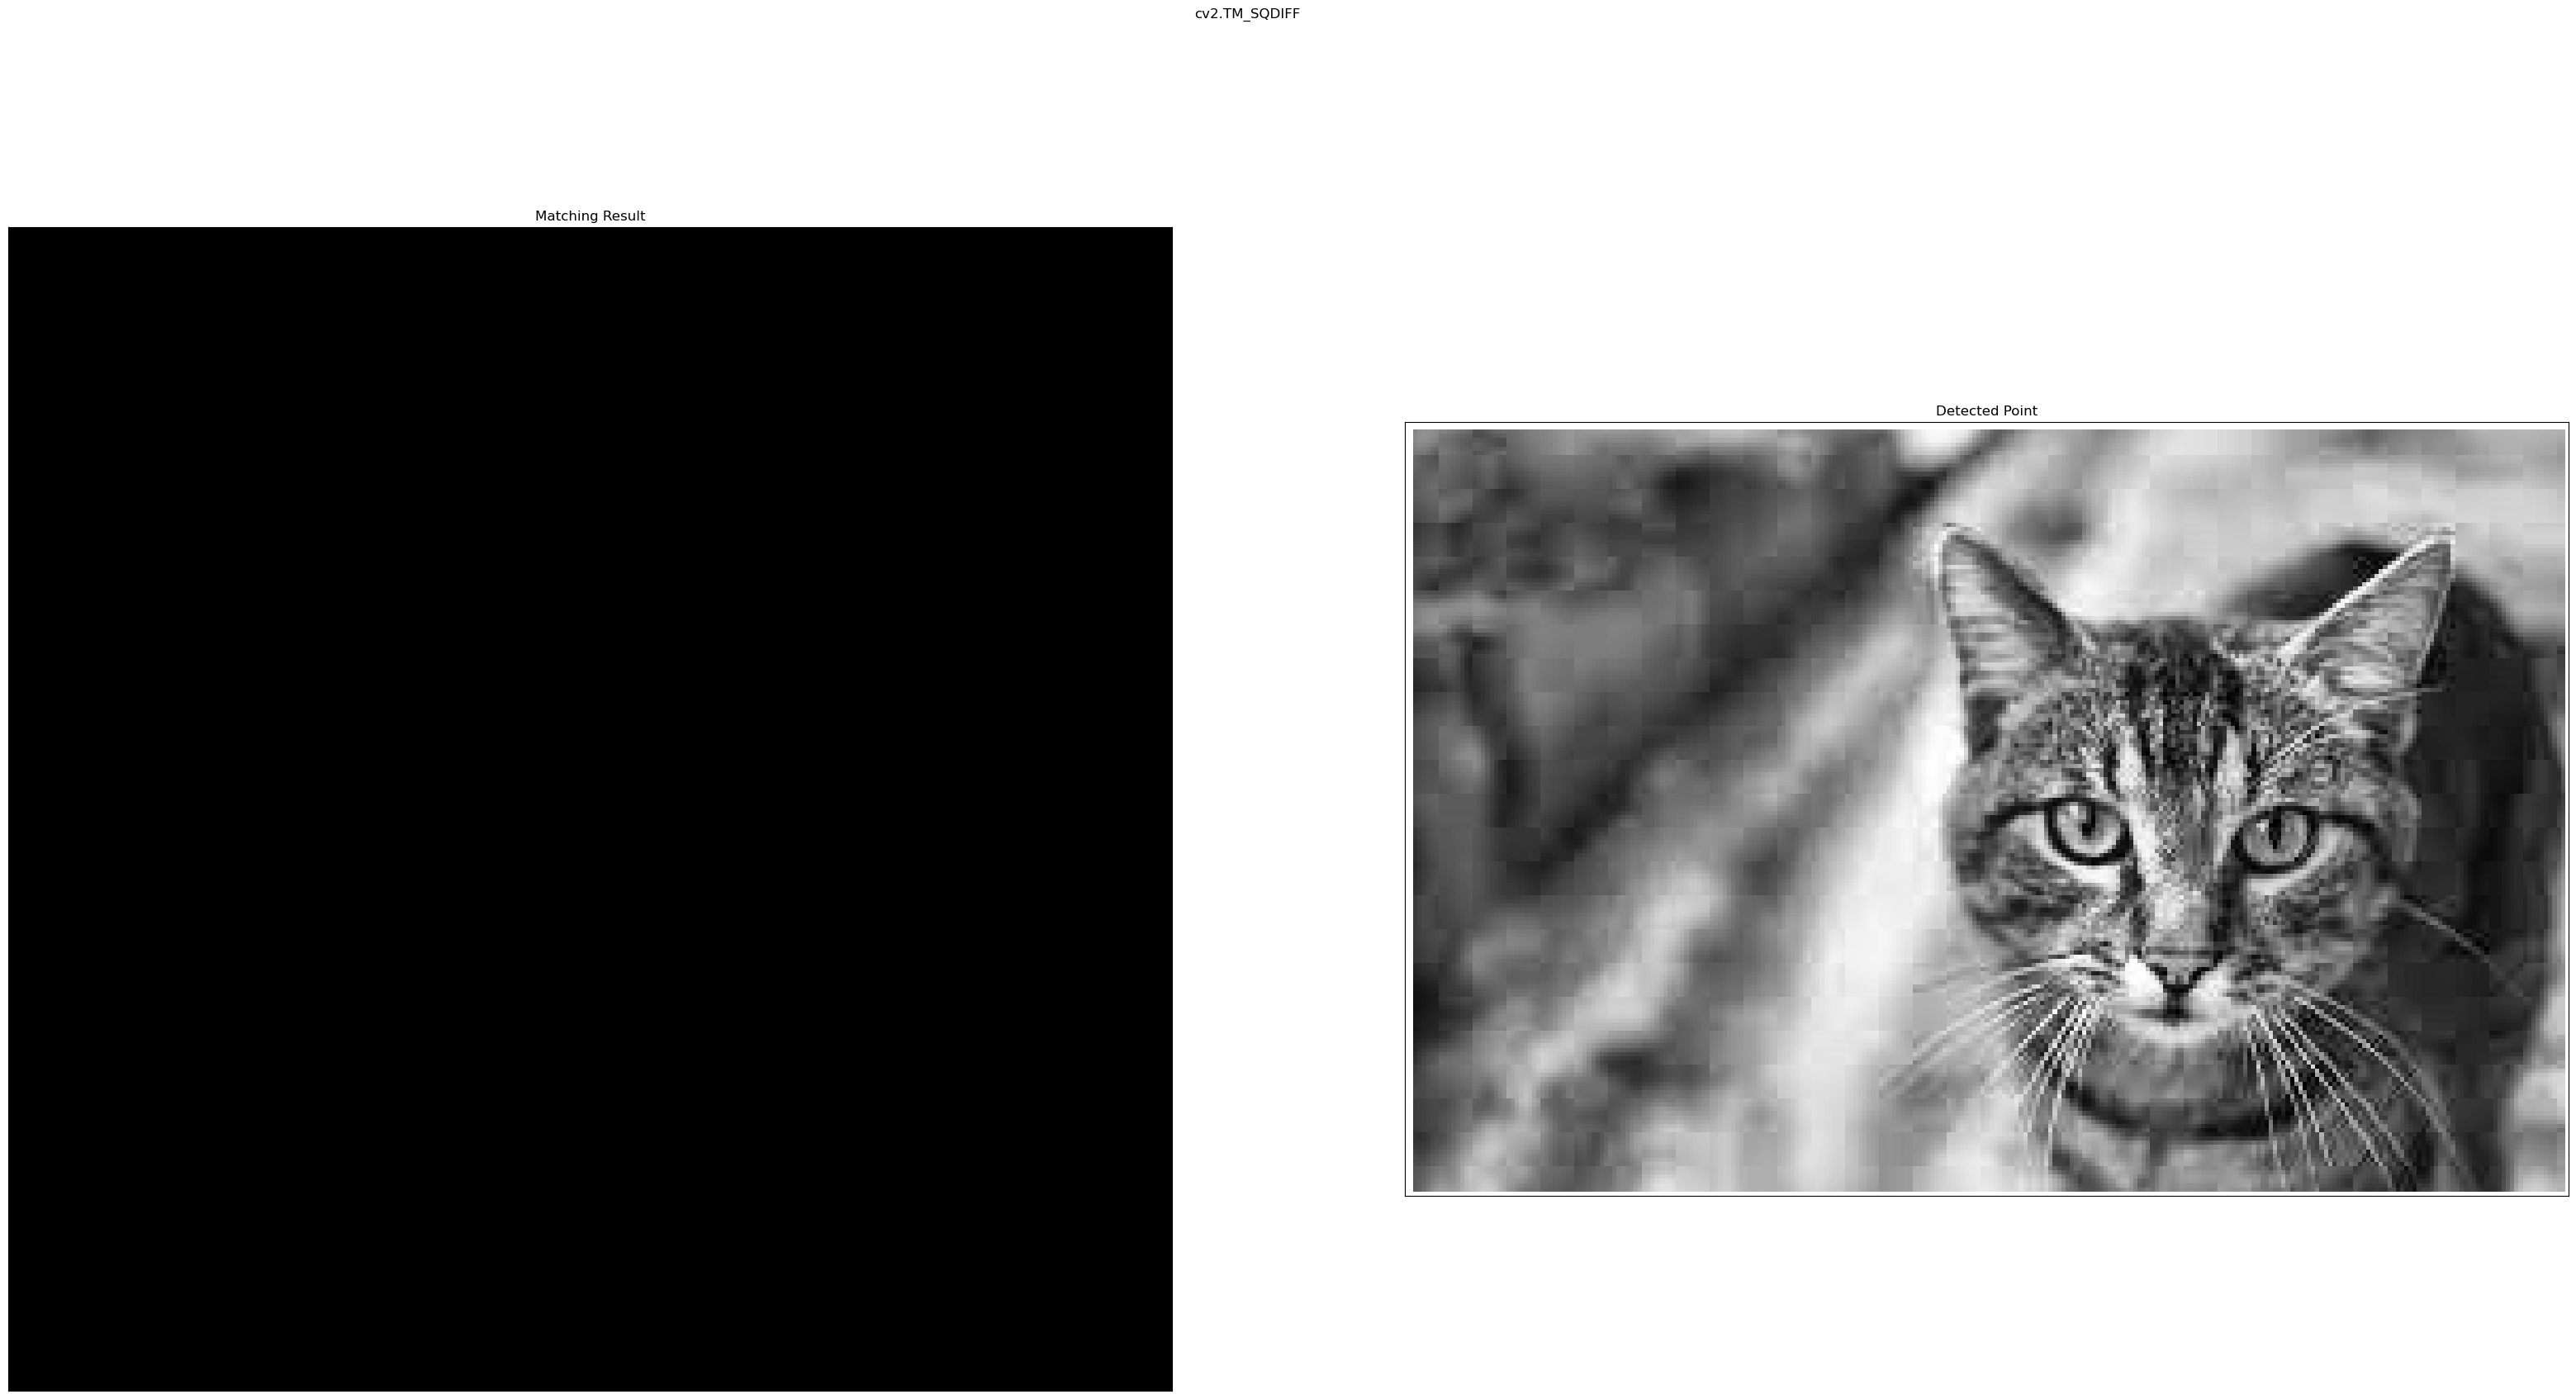

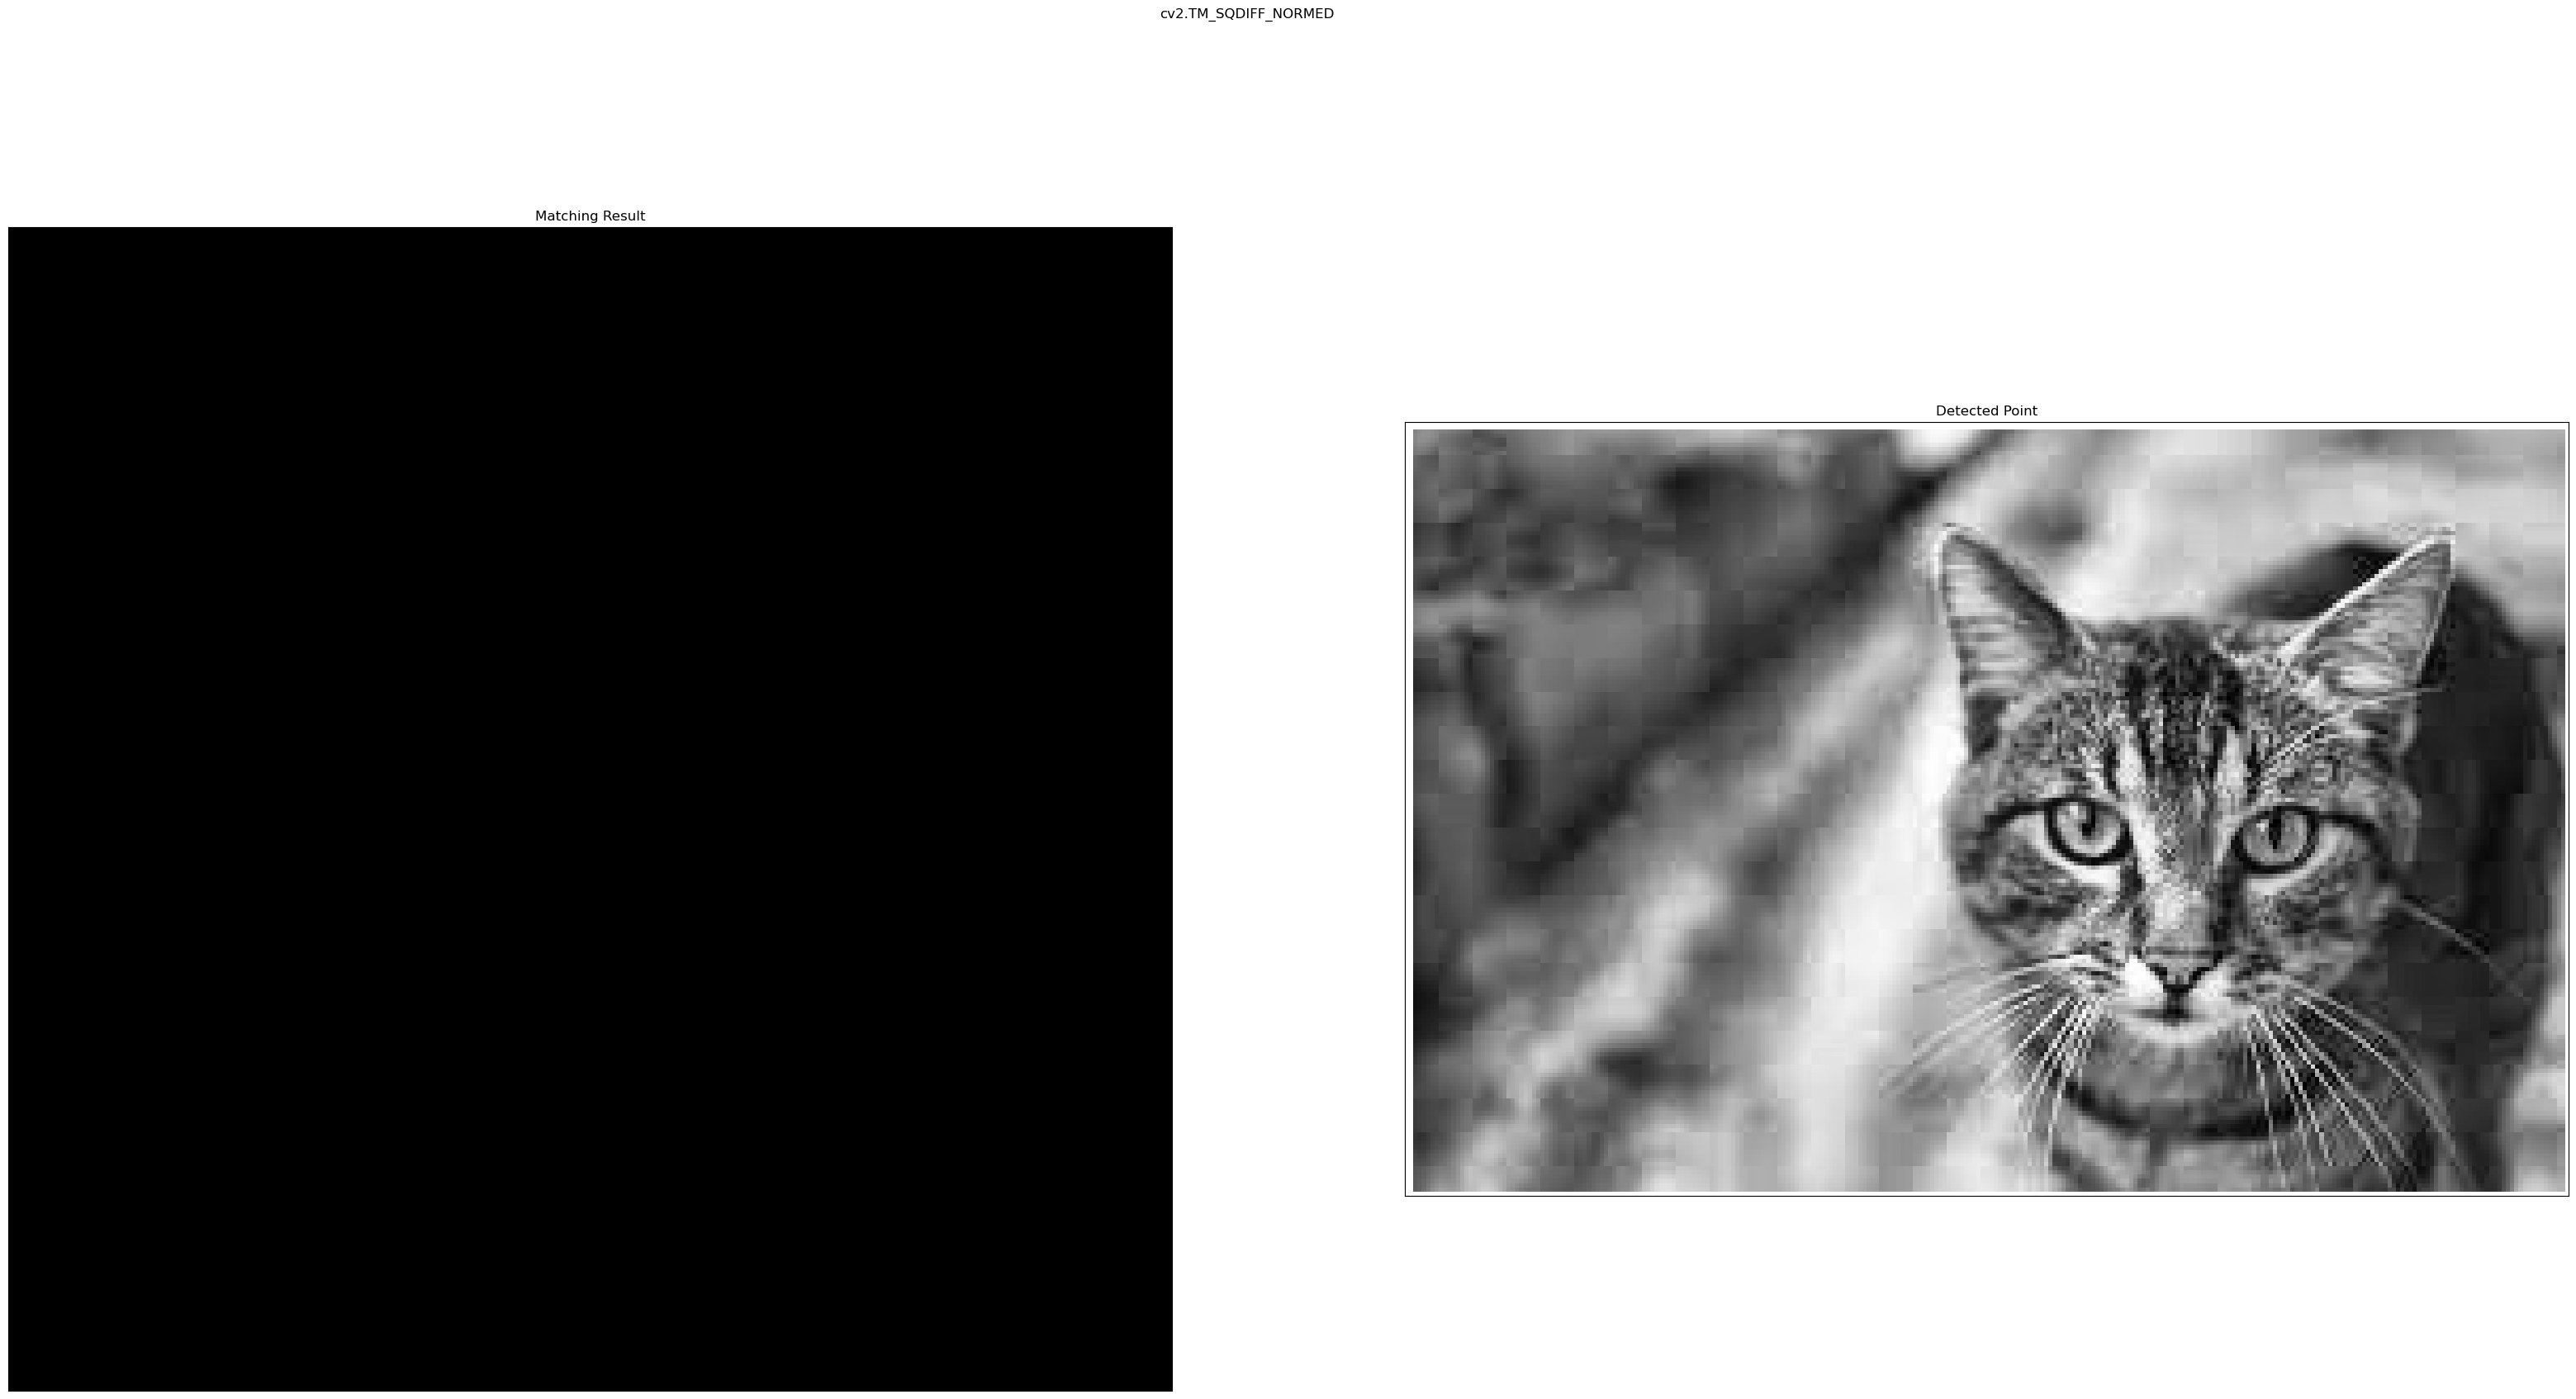

In [17]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(40,20))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


In [19]:
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = img_gray[162:162+50, 232:232+46]
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

In [20]:
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2.imwrite('slMG_2180.jpg',img_rgb)

True

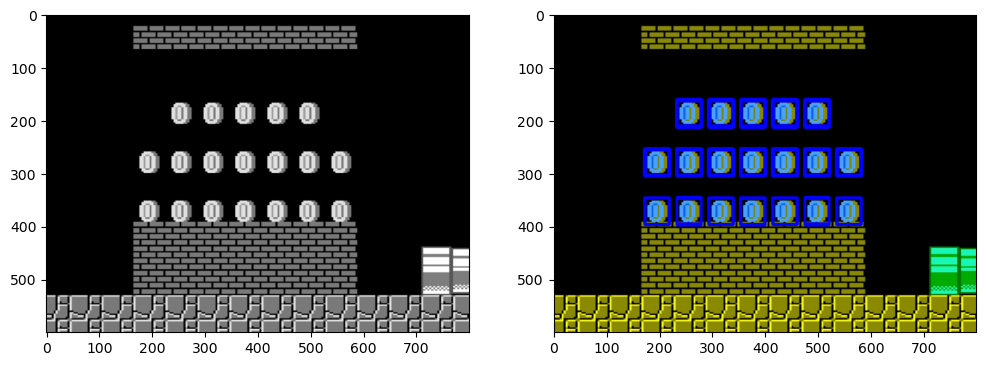

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img_gray, 'gray')
plt.subplot(122), plt.imshow(img_rgb)
plt.show()